In [1]:
import os
import json
import tiktoken
import pandas as pd

# Load the tokenizer
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

# Function to read and process JSON files in a folder
def process_json_folder(folder_path):
    # Initialize a list to store results
    tokens = []
    lengths = []
    dfs=[]
    total_tokens_list = []
    file_name_column = []

    # Iterate over files in the folder
    for file_name in os.listdir(folder_path):

        if file_name.endswith('.json'):
            file_name_column.append(file_name)
            total_tokens = 0
            file_path = os.path.join(folder_path, file_name)
            # Read JSON data from file
            with open(file_path, 'r') as file:
                json_data = json.load(file)
            # Extract text from JSON data
            text_list = [item['text'] for item in json_data['0']['ocr']]

            # Encode each text string and determine the length of tokens
            for i, text in enumerate(text_list, 1):
                # Encode the text
                enc = encoding.encode(text)
                # Determine the length of tokens
                num_tokens = len(enc)
                # Store results
                total_tokens= total_tokens + num_tokens

                # Append total tokens to the list

            total_tokens_list.append(total_tokens)


    df = pd.DataFrame({'File Name': file_name_column, 'Total Tokens': total_tokens_list})
    print(df)
    return df
# Specify the folder containing the JSON files
folder_path = 'test/test/'

# Process JSON files in the folder
df = process_json_folder(folder_path)



                                           File Name  Total Tokens
0    dcc4a106ec167c5624a2b25430f042fd.png.CACHE.json           181
1    e0abc9a25ac589aedafbbb26ec5ece3d.png.CACHE.json           740
2    25a7a30c448e90fe7a74a8cf63d9c974.png.CACHE.json           173
3    e2620553c53f7636ed76c4f45d9a679c.png.CACHE.json           259
4    57ab20f06d415a76b461cc120006cd2d.jpg.CACHE.json           127
..                                               ...           ...
275  ec21736a67a68366ac663509359b7c5a.png.CACHE.json           134
276  1babf4d02b82740ef69faf94d3519029.jpg.CACHE.json            61
277  bc1dcfe1372f4f0f7692c7108cc9eff5.png.CACHE.json           231
278  879fc26b7fc361fff6bc7681ba235ad3.png.CACHE.json           385
279  0ad48f253bb1dbb7b9e17d71c27261e7.png.CACHE.json           102

[280 rows x 2 columns]


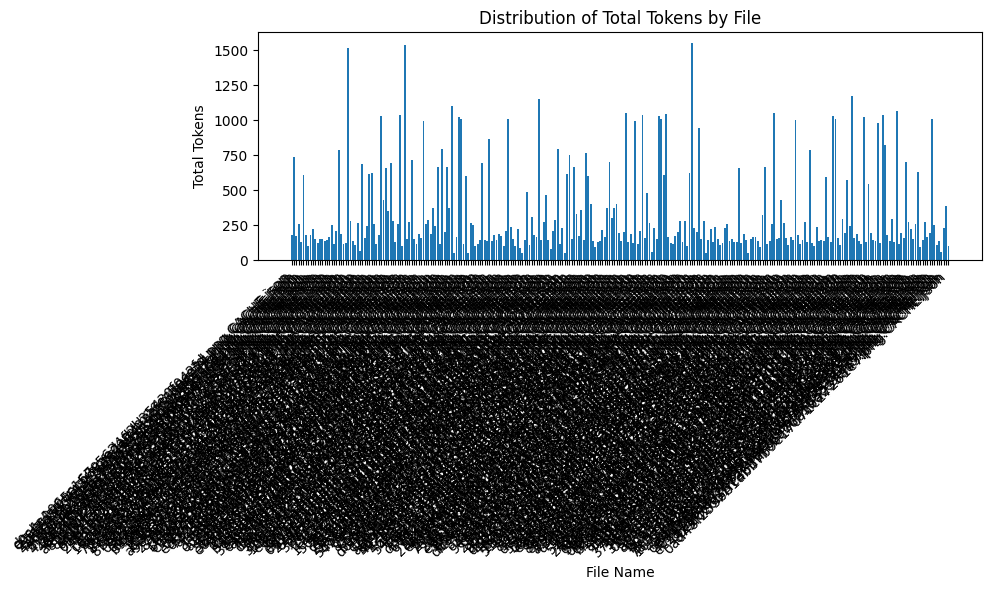

In [2]:
import matplotlib.pyplot as plt

# Plot filename against total tokens
plt.figure(figsize=(10, 6))
plt.bar(df['File Name'], df['Total Tokens'])
plt.xlabel('File Name')
plt.ylabel('Total Tokens')
plt.title('Distribution of Total Tokens by File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

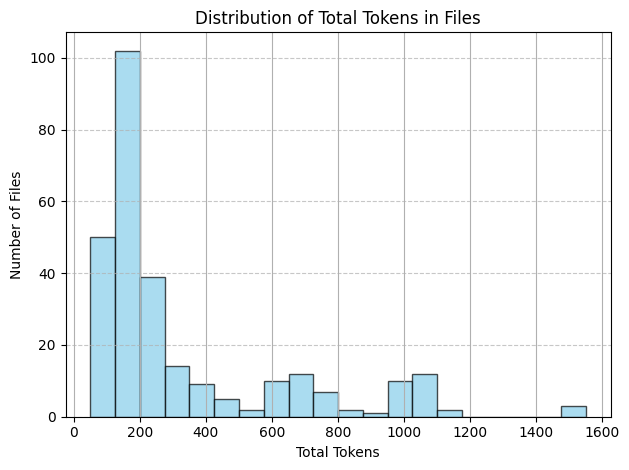

In [3]:
# Plot histogram showing the number of files for each number of tokens
plt.figure(figsize=(10, 6))
df.hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Total Tokens')
plt.ylabel('Number of Files')
plt.title('Distribution of Total Tokens in Files')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()